In [3]:
import numpy as np
import skimage
import scipy
import matplotlib.pyplot as plt
def Display(axes):
    try:
        iter(axes)
        for ax in axes:
            ax.axis('off')
    except TypeError:
        axes.axis('off')
    plt.tight_layout()
    plt.show()

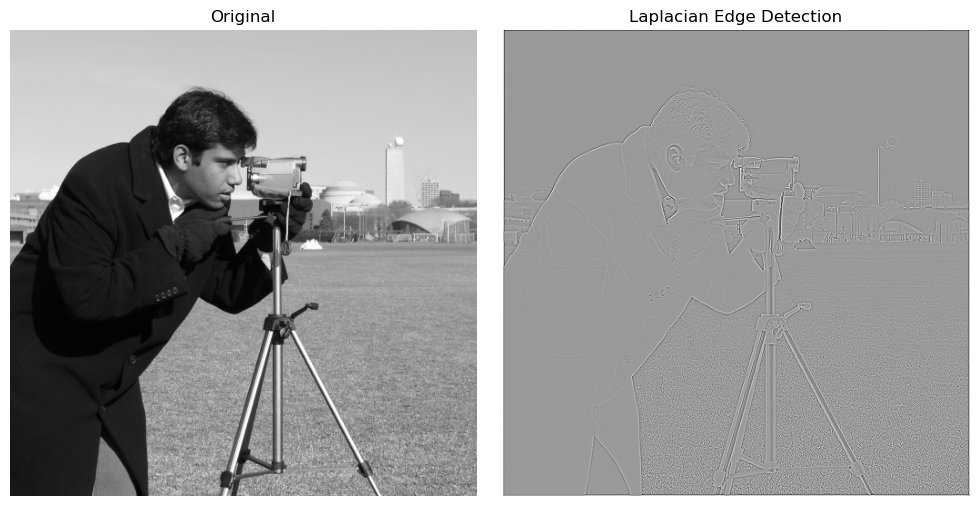

In [4]:
'''Laplacian Edge detection'''
photographer = skimage.data.camera()
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(photographer, cmap='gray')             #show original image as reference
axes[0].set_title("Original")

kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])        #laplacian filter compares pixel value to values in cardinal directions, if major difference, edge
axes[1].imshow(scipy.signal.convolve2d(photographer, kernel), cmap='gray')
axes[1].set_title("Laplacian Edge Detection")
Display(axes)

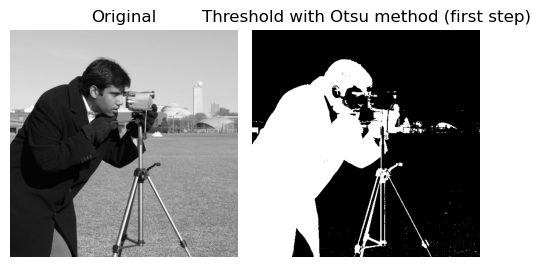

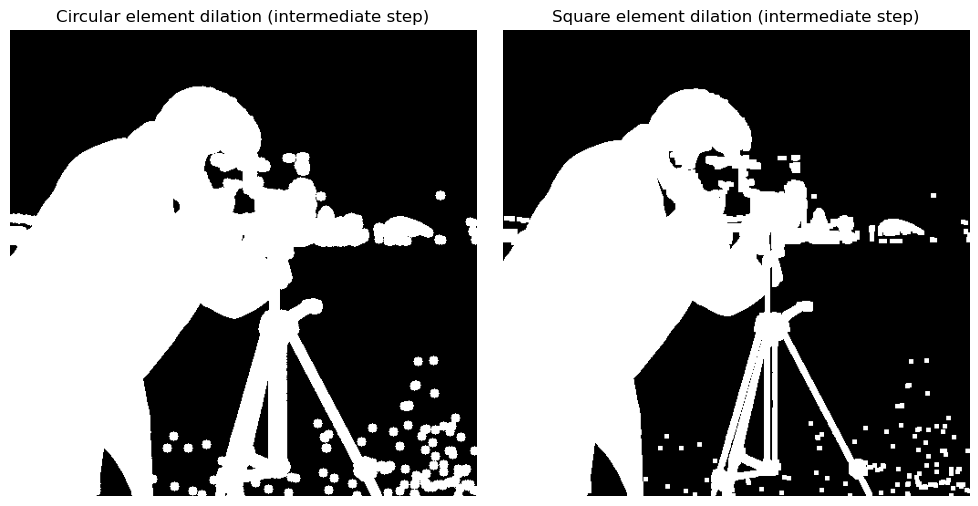

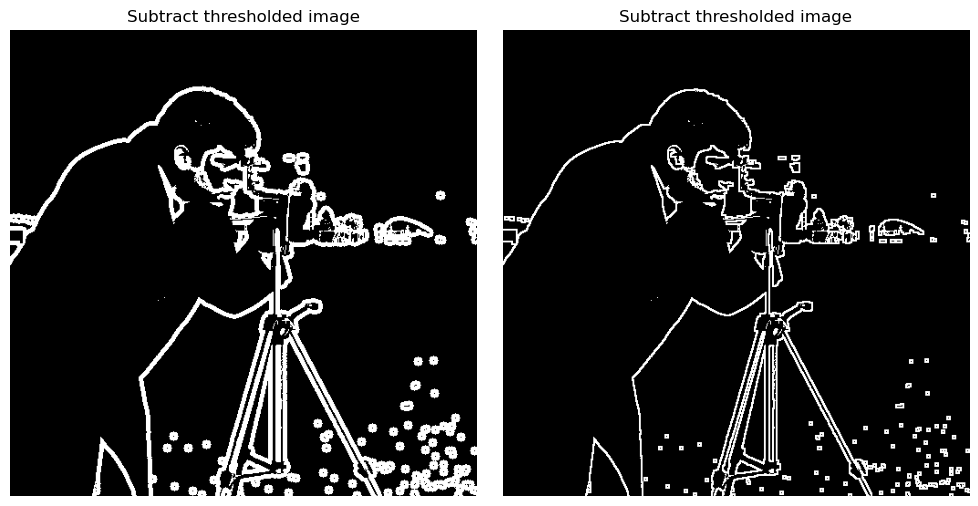

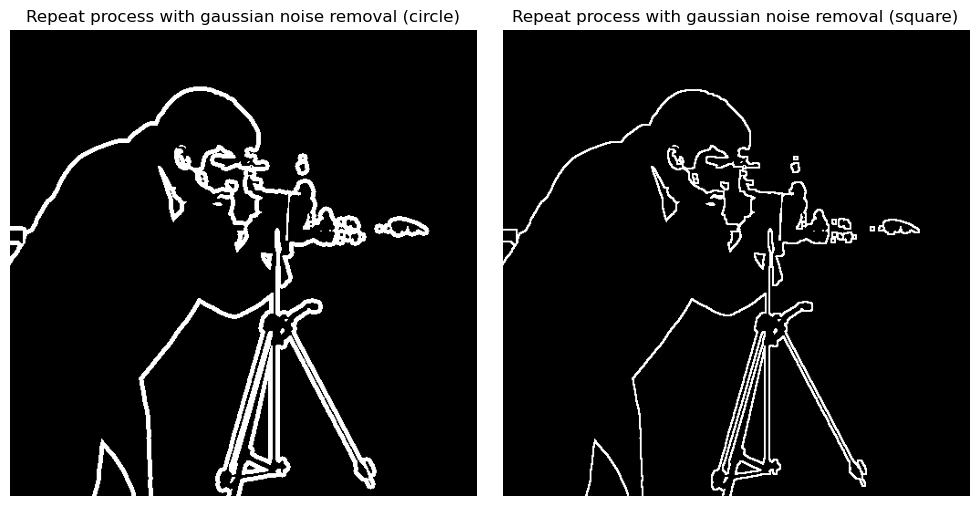

In [10]:
'''Morphological Edge Detection'''
fig, axes = plt.subplots(1,2, figsize=(5,5))
axes[0].imshow(photographer, cmap='gray')
axes[0].set_title("Original")
thresholded = photographer < skimage.filters.threshold_otsu(photographer)
axes[1].imshow(thresholded, cmap='gray')
axes[1].set_title("Threshold with Otsu method (first step)")

Display(axes)

fig, axes = plt.subplots(1,2, figsize=(10,5))

dilated = skimage.morphology.dilation(thresholded, skimage.morphology.disk(5))
axes[0].imshow(dilated, cmap='gray')
axes[0].set_title("Circular element dilation (intermediate step)")

dilated2 = skimage.morphology.dilation(thresholded, skimage.morphology.square(5))
axes[1].imshow(dilated2, cmap='gray')
axes[1].set_title("Square element dilation (intermediate step)")

Display(axes)

fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].imshow(dilated^thresholded, cmap='gray')
axes[0].set_title("Subtract thresholded image")
axes[1].imshow(dilated2^thresholded,cmap='gray')
axes[1].set_title("Subtract thresholded image")

Display(axes)

GaussianPhotographer = scipy.ndimage.gaussian_filter(photographer,1)       #repeat with blurred photographer using gaussian filter to remove some noise
GThresholded = GaussianPhotographer < skimage.filters.threshold_otsu(GaussianPhotographer)
Gdilated = skimage.morphology.dilation(GThresholded, skimage.morphology.disk(5))
Gdilated2 = skimage.morphology.dilation(GThresholded, skimage.morphology.square(5))

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(Gdilated^GThresholded, cmap='gray')
axes[0].set_title("Repeat process with gaussian noise removal (circle)")
axes[1].imshow(Gdilated2^GThresholded,cmap='gray')
axes[1].set_title("Repeat process with gaussian noise removal (square)")

Display(axes)